In [26]:
import warnings
warnings.simplefilter('ignore')
import statsmodels.api as sm

In [43]:
import numpy as np
x = list(range(1, 200))
y = [0]
for i in range(200):
    y.append(y[i] + np.random.normal(0, 1))

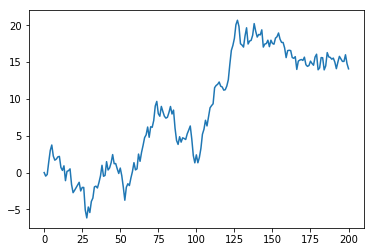

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y)

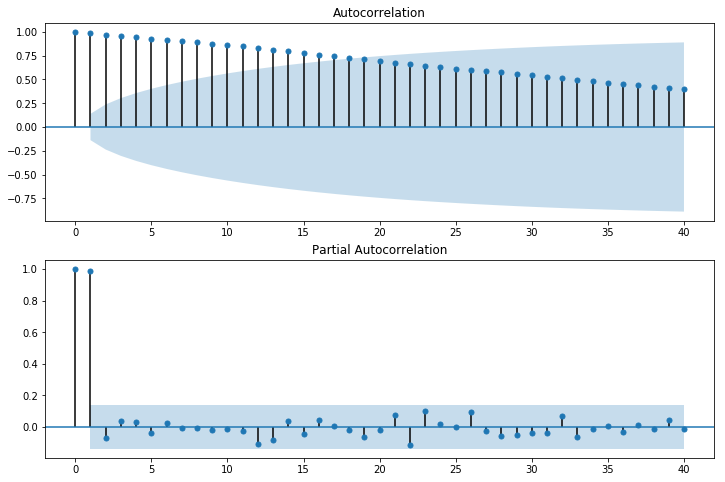

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [52]:
from statsmodels import tsa

In [79]:
x = list(range(len(y)))
ar_list = list(range(0, 4))
ma_list = list(range(0, 4))
for ar in ar_list:
    for ma in ma_list:
        try:
            model = tsa.arima_model.ARIMA(y, order=(ar, 0, ma))
            res = model.fit()
            print('ar=%d, ma=%d, aic=%d' % (ar, ma, res.aic))
        except:
            print('no result')

ar=0, ma=0, aic=1387
ar=0, ma=1, aic=1146
no result
no result
ar=1, ma=0, aic=593
ar=1, ma=1, aic=594
ar=1, ma=2, aic=595
ar=1, ma=3, aic=597
ar=2, ma=0, aic=594
ar=2, ma=1, aic=595
ar=2, ma=2, aic=597
no result
ar=3, ma=0, aic=595
ar=3, ma=1, aic=597
ar=3, ma=2, aic=595
ar=3, ma=3, aic=596


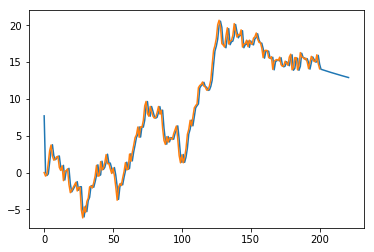

In [84]:
model = tsa.arima_model.ARIMA(y, order=(1, 0, 0))
res = model.fit()
pred = res.predict(start=0, end=len(x)+20)
plt.plot(list(range(len(pred))), pred)
plt.plot(x, y)